In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [2]:
road = cv2.imread('road.jpeg')

In [3]:
road_copy = np.copy(road)

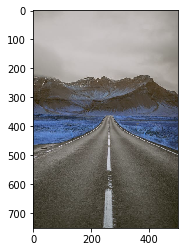

In [4]:
plt.imshow(road)

In [5]:
road.shape[:2]

(750, 500)

In [6]:
marker_image = np.zeros(road.shape[:2],dtype=np.int32)

In [7]:
segments = np.zeros (road.shape,dtype=np.uint8)

In [9]:
marker_image.shape

(750, 500)

In [10]:
segments.shape

(750, 500, 3)

In [13]:
cm.tab10(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [27]:
def create_rgb(i):
    return tuple(np.array(cm.tab10(0)[:3])*255)

In [28]:
colors =[]
for i in range(10):
    colors.append(create_rgb(i))

In [29]:
colors

[(31.0, 119.0, 180.0),
 (31.0, 119.0, 180.0),
 (31.0, 119.0, 180.0),
 (31.0, 119.0, 180.0),
 (31.0, 119.0, 180.0),
 (31.0, 119.0, 180.0),
 (31.0, 119.0, 180.0),
 (31.0, 119.0, 180.0),
 (31.0, 119.0, 180.0),
 (31.0, 119.0, 180.0)]

In [41]:
###Global variables
#Color choice
n_markers = 10
current_marker = 1
#MARKERS UPDATED BY WATERSHEd
marker_updates = False

In [49]:
marks_updated = False
def mouse_callback(event,x,y,flags,param):
        if event == cv2.EVENT_LBUTTONDOWN:
            cv2.circle(marker_image,(x,y),10,(current_marker),-1)
            cv2.circle(road_copy,(x,y),10,colors[current_marker],-1)
            marks_updated = True
              

In [ ]:
### 
# GLOBAL VARIABLES
# COLOR CHOICE
current_marker = 1
n_markers = 10 #0:9

# Markers updated by watershed

# WHILE TRUE
cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image',mouse_callback)
while True:
    cv2.imshow('Waterdhed Segments' , segments)
    cv2.imshow('Road Image',road_copy)
    
    # CLOSE ALL WINDOWS
    k =cv2.waitKey(1)
    if k == 27:
        break
    elif k == ord('c'):
        road_copy = road.copy()
        marker_img = np.zeros(road.shape[:2],dtype = np.int32)
        segments = np.zeros(road.shape,dtype = np.uint8)
   
    # UPDATE COLOR CHOICE
    elif k > 0 and chr(k).isdigit():
        current_marker = int(chr(k))

    # UPDATE THE MARKINGS
    if marks_updated:
        
        marker_image_copy = marker_img.copy()
        cv2.watershed(road ,marker_image_copy)
        segments = np.zeros(road.shape,dtype = np.uint8)
        
        for color_ind in range(n_markers):
            segments[marker_image_copy == (color_ind)] = colors[color_ind]
            
            
cv2.destroyAllWindows()